In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Smok Data.csv')

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
df.shape

(1338, 6)

# Column Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
df.region=le.fit_transform(df['region'])
df.sex=le.fit_transform(df['sex'])

In [8]:
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,yes
1,2,18,1,33.770,1,no
2,2,28,1,33.000,3,no
3,1,33,1,22.705,0,no
4,1,32,1,28.880,0,no


In [9]:
df.columns

Index(['region', 'age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

# Dropping column smoker 

In [10]:
x=df.drop('smoker',axis=1)
y=df['smoker']

In [11]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# Separating DataSet

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70,random_state=1)

In [14]:
xtrain.shape

(936, 5)

In [15]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [16]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

Finding the Model

In [18]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

Testing the model

In [19]:
testing=clf.predict(xtest)

In [20]:
testing # Predicted result

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'n

In [21]:
df_testing = pd.DataFrame(testing, columns=['predicted_smoker'])
df_testing.head()

,predicted_smoker
0,yes
1,yes
2,no
3,yes
4,no


In [22]:
np.array(ytest) #actual data

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

Evaluating the performance

In [23]:
clf.score(xtest,ytest)

0.6666666666666666

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

In [25]:
#tree.plot_tree(clf)

[Text(188.46968207700652, 638.73, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(115.90405538232105, 611.5500000000001, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(31.470715835141, 584.37, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(29.049891540130155, 557.19, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(16.945770065075923, 530.01, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(7.262472885032539, 502.83000000000004, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(4.841648590021692, 475.65000000000003, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(9.683297180043384, 475.65000000000003, 'bmi <= 18.953\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(4.841648590021692, 448.47, 'age <= 34.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(2.420824295010846, 421.29, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(7.262472885032539, 421.2

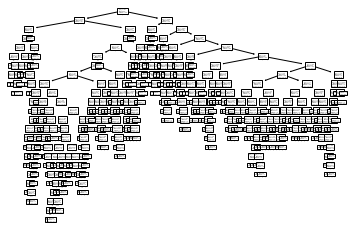

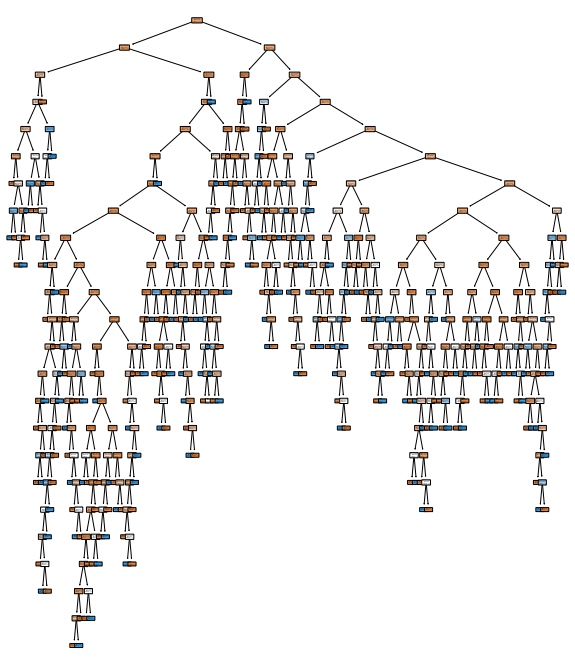

In [26]:
tree.plot_tree(clf)
x_features=x.columns
plt.figure(figsize=(10,12))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)

In [27]:
import seaborn as sns


In [28]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

% of Smoker & non smoker

In [29]:
274/(274+1064)# Smoker

0.20478325859491778

In [30]:
1064/(274+1064)# non Smoker

0.7952167414050823

<AxesSubplot:xlabel='smoker', ylabel='count'>

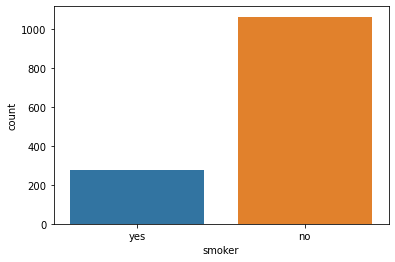

In [31]:
sns.countplot(x='smoker',data=df)

<AxesSubplot:xlabel='count', ylabel='smoker'>

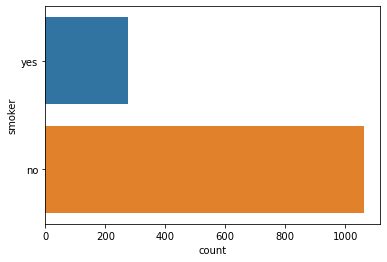

In [32]:
sns.countplot(y='smoker',data=df)

<AxesSubplot:xlabel='count', ylabel='sex'>

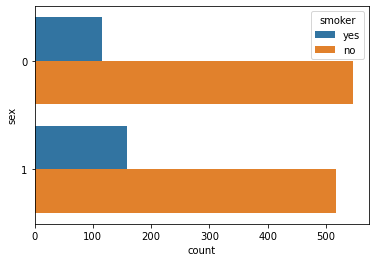

In [33]:
sns.countplot(y='sex',data=df,hue='smoker')

<AxesSubplot:xlabel='sex', ylabel='count'>

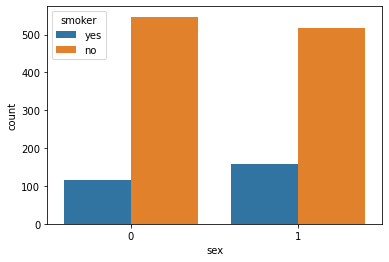

In [34]:
sns.countplot(x='sex',data=df,hue='smoker')

In [35]:
from sklearn.model_selection import train_test_split as tts

In [36]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70,random_state=1)

In [37]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [38]:
xtrain.shape

(936, 5)

In [39]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

In [40]:
ytrain.value_counts()

no     743
yes    193
Name: smoker, dtype: int64

In [41]:
193/(193+743)#smoker

0.20619658119658119

# Model Creation

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [43]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [44]:
testing=clf.predict(xtest)# Predicted Result

In [45]:
testing

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'n

In [46]:
import numpy as np
np.array(ytest) #Actual Result

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

In [47]:
clf.score(xtest,ytest)

0.6691542288557214

In [48]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,plot_roc_curve

In [49]:
classification_report(ytest,testing)

'              precision    recall  f1-score   support\n\n          no       0.80      0.78      0.79       321\n         yes       0.20      0.22      0.21        81\n\n    accuracy                           0.67       402\n   macro avg       0.50      0.50      0.50       402\nweighted avg       0.68      0.67      0.67       402\n'

In [50]:
print(classification_report(ytest,testing))

              precision    recall  f1-score   support

          no       0.80      0.78      0.79       321
         yes       0.20      0.22      0.21        81

    accuracy                           0.67       402
   macro avg       0.50      0.50      0.50       402
weighted avg       0.68      0.67      0.67       402



In [51]:
xtest.shape

(402, 5)

In [52]:
confusion_matrix(ytest,testing) #

array([[251,  70],
       [ 63,  18]], dtype=int64)

In [53]:
con_mat=confusion_matrix(ytest,testing) #


In [54]:
con_mat

array([[251,  70],
       [ 63,  18]], dtype=int64)

In [55]:
(251+14)/(251+14+70+67)

0.6592039800995025

<AxesSubplot:>

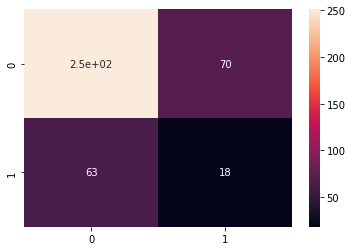

In [56]:
sns.heatmap(con_mat,annot=True)

In [57]:
tp,fn,fp,tn=confusion_matrix(ytest,testing).reshape(-1)

In [58]:
tp

251

In [59]:
fn

70

In [60]:
fp

63

In [61]:
tn

18

# Precision or Positive Predictive value(PPV)

In [62]:
ppv=tp/(tp+fp)

In [63]:
ppv

0.7993630573248408

# Sensitivity,Recall,Hit Rate,or True Positive Rate(TPR)

In [64]:
tpr=tp/(tp+fp)

In [65]:
tpr


0.7993630573248408

# False Positive Rate(FPR)

In [66]:
fpr=fp/(fp+tn)

In [67]:
fpr

0.7777777777777778

# F1 Measure

In [68]:
f1_measure=(ppv+tpr)/2

In [69]:
f1_measure


0.7993630573248408

In [70]:
#f1_measure=(0.8006329113924051+0.8006329113924051)/2

In [71]:
#f1_measure

Harmonic Mean,F1 Score

In [72]:
f1=(2*ppv*tpr)/(ppv+tpr)

In [73]:
f1

0.7993630573248408

In [74]:
#f1=(2*0.8006329113924051*0.8006329113924051)/(0.8006329113924051+0.8006329113924051)

Specificity,Selectivity or True Negative Rate

In [75]:
specificity=tn/(tn+fp)

In [76]:
specificity

0.2222222222222222

Threat Score(TS) or Critical Success Index(CSI):

In [77]:
csi=tp/(tp+fn+fp)

In [78]:
csi

0.6536458333333334

False Discovery Rate(FDR):

In [79]:
fdr=fp/(tp+fp)

In [80]:
fdr

0.20063694267515925

Informedness or bookmark infomedness(BM)=tpr+tnr(specificity)-1

In [81]:
bm=tpr+specificity-1

In [82]:
bm


0.02158527954706302

# Markedness(MK) or deltap=ppv+npv-1

In [83]:
npv=tn/(fn+tn)

In [84]:
npv

0.20454545454545456

In [85]:
mk=ppv+npv-1

In [86]:
mk

0.003908511870295284

# Fowlkes-Mallows Index(FM)

In [87]:
# fm=sqrt(tp/(tp+fp)*tp/(tp+fn))

In [88]:
import math

In [89]:
fm=math.sqrt(tp/(tp+fp)*tp/(tp+fn))

In [90]:
fm

0.7905992194664636

# ROC Curve

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
from sklearn import metrics 

In [93]:
log_regression = LogisticRegression()

In [94]:
log_regression.fit(xtrain,ytrain)

LogisticRegression()

In [95]:
y_pred_proba = log_regression.predict_proba(xtest)[::,1]

In [97]:
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_proba)

ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.